In [49]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [50]:
x_numpy,y_numpy = datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=1)

X = torch.from_numpy(x_numpy.astype(np.float32))
Y = torch.from_numpy(y_numpy.astype(np.float32))
Y = Y.view(Y.shape[0],1)

n_samples,n_feature = X.shape
learning_rate=0.01
input_size = n_feature
output_size = 1
# Define model 
model = nn.Linear(input_size,output_size)
# loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

#Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # forward pass and loss
    y_pred = model(X)
    # loss
    loss = criterion(y_pred,Y)
    #backward pass
    loss.backward()
    #update
    optimizer.step()
    # empty the optimizer
    optimizer.zero_grad()
    if epoch%10==0:
        print(f'Epoch {epoch}, loss : {loss.item():.4f}')
    
    


Epoch 0, loss : 5740.7119
Epoch 10, loss : 4250.3096
Epoch 20, loss : 3173.4189
Epoch 30, loss : 2394.4043
Epoch 40, loss : 1830.2600
Epoch 50, loss : 1421.3097
Epoch 60, loss : 1124.5852
Epoch 70, loss : 909.1039
Epoch 80, loss : 752.4980
Epoch 90, loss : 638.5985


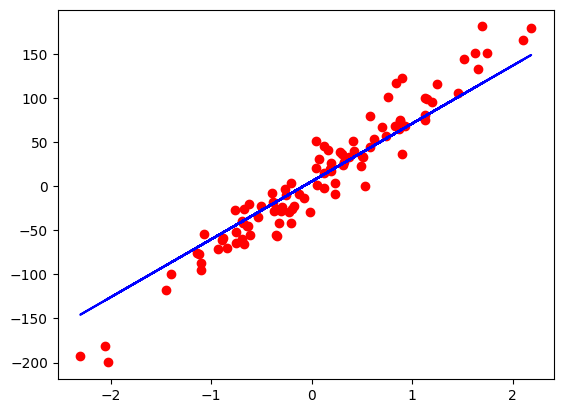

In [51]:
predicted = model(X).detach().numpy()
# Plot
plt.plot(x_numpy,y_numpy,'ro')
plt.plot(x_numpy,predicted,'b')